# House Prices King County

## 1. Load Dataset

In [381]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# set bins in tickers
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns

In [2]:
# load dataset
h_price = pd.read_csv("King_County_House_prices_dataset.csv")#, na_values=['?'])

## 2. Column Analysis
Short Analysis of Columns, eg types, nans etc

In [4]:
h_price.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
# date in m/d/y -> turn to days, remember start date, end date

### dichotomous data
# waterfront
# view

### ordinal data (turn into dummy data)
# bedrooms
# bathrooms
# floors
# condition
# grade
# zipcodes

### continuous data
# price
# sqft_living
# sqft_lot
# sqft_above
# sqft_basement
# yr_built
# yr_renovated
# lat / long
# sqft_living15 / sqft_living15

In [463]:
## number of nans in columns
print(h_price.isna().sum())
# percentage
print(h_price.isna().sum()/h_price.shape[0])

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date_m              0
date_d              0
date_y              0
price_m2            0
dtype: int64
id               0.000000
date             0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.110031
view             0.002917
condition        0.000000
grade            0.000000
sqft_above       0.000000
sqft_basement    0.000000
yr_built         0.000000
yr_renovated     0.177920
zipcode          0.00

In [7]:
# only NANs in:
#    waterfront, view, yr_renovated

In [8]:
### Change date to useful data eg date, month, year
h_price['date_m'] = np.array([i.split('/')[0] for i in h_price.date.values]).astype(int)
h_price['date_d'] = np.array([i.split('/')[1] for i in h_price.date.values]).astype(int)
h_price['date_y'] = np.array([i.split('/')[2] for i in h_price.date.values]).astype(int)

In [10]:
h_price.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_m,date_d,date_y
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,10,13,2014
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,9,2014
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,NaN,98028,47.7379,-122.233,2720,8062,2,25,2015
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,12,9,2014
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,2,18,2015


### 2.1 Outliers

In [241]:
pd.set_option("display.max_columns", None)
h_price.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_m,date_d,date_y
count,2.159400e+04,21594.00,21594.00,21594.00,21594.00,21594.00,21594.00,19218.00,21531.00,21594.00,21594.00,21594.00,21594.00,17752.00,21594.00,21594.00,21594.00,21594.00,21594.00,21594.00,21594.00,21594.00
mean,4.580861e+09,540212.33,3.37,2.12,2079.77,15086.75,1.49,0.01,0.23,3.41,7.66,1788.25,1971.00,83.54,98077.95,47.56,-122.21,1986.54,12749.52,6.57,15.69,2014.32
std,2.876743e+09,367202.19,0.90,0.77,914.83,41367.50,0.54,0.09,0.77,0.65,1.17,826.16,29.37,399.72,53.52,0.14,0.14,684.98,27240.51,3.12,8.63,0.47
min,1.000102e+06,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00,1.00,1.00,2014.00
25%,2.123049e+09,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00,4.00,8.00,2014.00
50%,3.904931e+09,450000.00,3.00,2.25,1910.00,7619.00,1.50,0.00,0.00,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00,6.00,16.00,2014.00
75%,7.309050e+09,645000.00,4.00,2.50,2550.00,10684.75,2.00,0.00,0.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10082.25,9.00,23.00,2015.00
max,9.900000e+09,7700000.00,10.00,8.00,12050.00,1651359.00,3.50,1.00,4.00,5.00,13.00,8860.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00,12.00,31.00,2015.00


#### 2.1.1 Bedrooms

In [155]:
# 33 bedrooms, coordinates show small house, outlier, not useful for analysis
h_price.bedrooms.argmax()
h_price[15856:15857]
##### remove false bedrooms
h_price = h_price.drop(h_price.index[h_price.bedrooms.argmax()])
h_price.sort_values('bedrooms', ascending=False).head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_m,date_d,date_y
13301,627300145,8/14/2014,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,3,9,2500,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400,8,14,2014
19239,8812401450,12/29/2014,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,4,7,1860,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745,12,29,2014
15147,5566100170,10/29/2014,650000.0,10,2.00,3610,11914,2.0,0.0,0.0,4,7,3010,600.0,1958,0.0,98006,47.5705,-122.175,2040,11914,10,29,2014


#### 2.1.2 Sqft_living

grade is [12] out of 13


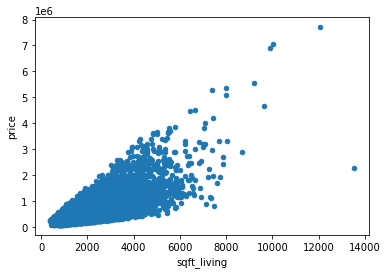

In [157]:
h_price.plot.scatter(x='sqft_living', y='price');
# linear dependence, one outlier
print('grade is {} out of 13'.format(h_price[h_price.sqft_living.argmax():h_price.sqft_living.argmax()+1].grade.values))
h_price = h_price.drop(h_price.index[h_price.sqft_living.argmax()])

## 3. Short indepenent EDA

In [115]:
pd.set_option("display.max_columns", None)
h_price.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_m,date_d,date_y
count,2.159600e+04,21596.00,21596.00,21596.00,21596.00,21596.00,21596.00,19220.00,21533.00,21596.00,21596.00,21596.00,21596.00,17754.00,21596.00,21596.00,21596.00,21596.00,21596.00,21596.00,21596.00,21596.00
mean,4.580575e+09,540291.96,3.37,2.12,2080.34,15099.83,1.49,0.01,0.23,3.41,7.66,1788.63,1971.00,83.64,98077.95,47.56,-122.21,1986.65,12758.66,6.57,15.69,2014.32
std,2.876764e+09,367376.02,0.90,0.77,918.12,41413.55,0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.96,53.51,0.14,0.14,685.23,27275.02,3.12,8.63,0.47
min,1.000102e+06,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00,1.00,1.00,2014.00
25%,2.123049e+09,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00,4.00,8.00,2014.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7619.00,1.50,0.00,0.00,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00,6.00,16.00,2014.00
75%,7.308950e+09,645000.00,4.00,2.50,2550.00,10685.50,2.00,0.00,0.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00,9.00,23.00,2015.00
max,9.900000e+09,7700000.00,11.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00,12.00,31.00,2015.00


This column can not be represented as a histogram
This column can not be represented as a histogram


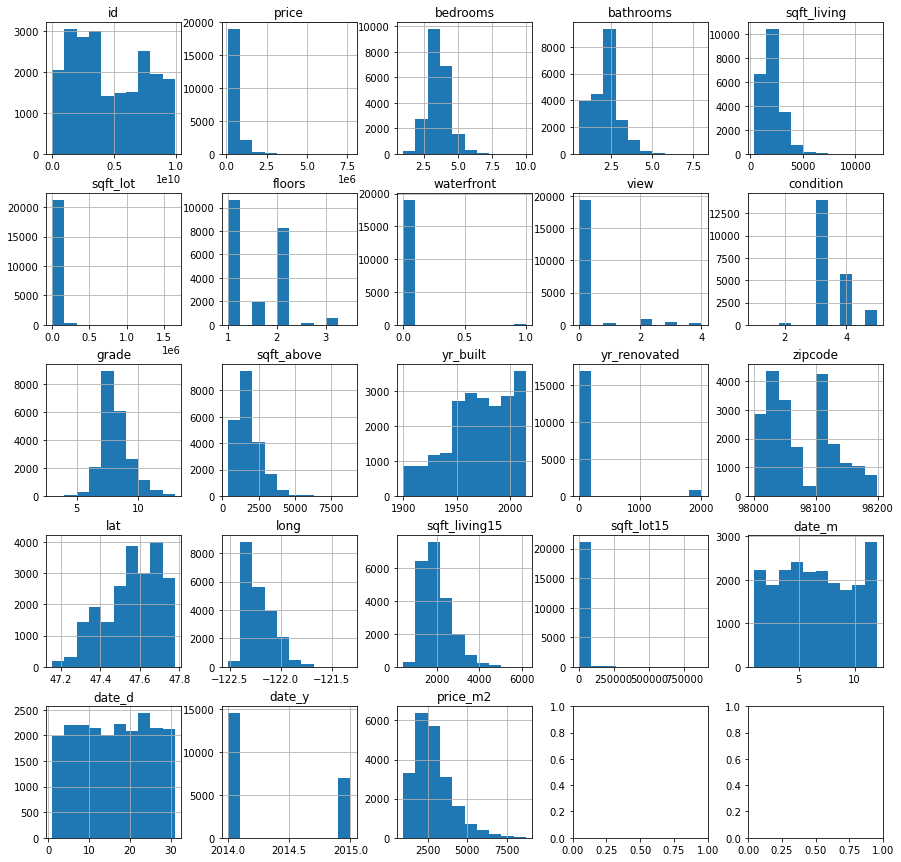

In [311]:
# Get list of numeric features
l = []
for feat in h_price.columns: 
    try:      
        h_price[feat] = pd.to_numeric(h_price[feat]) 
        l.append(feat)
    except ValueError:
        print('This column can not be represented as a histogram')
n=int(len(l)/5)+1
fig, axes = plt.subplots(5,n, figsize=(15,15))
i, j = 0, 0
for feat in l:
    if i==5:
        i=0
        j+=1
    h_price.hist(column=feat, ax=axes[j][i])
    i+=1

### 3.1 id

In [14]:
print('number of ids is {}\nnumber of unique ids is {}\nhouses are count double {}'.format(h_price.shape[0],h_price.id.unique().shape[0], h_price.shape[0] - h_price.id.unique().shape[0]))


number of ids is 21596
number of unique ids is 21419
houses are count double 177


In [15]:
# 177 multiple counts, so maybe houses were sold multiple times in measured time range

## 4. Dependent EDA

In [22]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

# Calculate correlation matrix
corr = h_price.corr()

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_m,date_d,date_y
id,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,0.02,-0.01,-0.01,-0.00,0.02,-0.00,-0.14,-0.01,0.00,0.01
price,-0.02,1.00,0.32,0.53,0.70,0.09,0.26,0.28,0.40,0.04,0.67,0.61,0.05,0.13,-0.05,0.31,0.02,0.59,0.08,-0.01,-0.01,0.00
bedrooms,0.00,0.32,1.00,0.53,0.59,0.03,0.18,-0.00,0.08,0.02,0.37,0.49,0.16,0.02,-0.16,-0.01,0.14,0.40,0.03,-0.00,-0.01,-0.01
bathrooms,0.01,0.53,0.53,1.00,0.76,0.09,0.50,0.07,0.19,-0.13,0.67,0.69,0.51,0.05,-0.20,0.02,0.22,0.57,0.09,0.01,-0.01,-0.03
sqft_living,-0.01,0.70,0.59,0.76,1.00,0.17,0.35,0.11,0.28,-0.06,0.76,0.88,0.32,0.06,-0.20,0.05,0.24,0.76,0.18,0.01,-0.01,-0.03
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.00,0.02,0.08,-0.01,0.11,0.18,0.05,0.00,-0.13,-0.09,0.23,0.14,0.72,-0.00,0.00,0.01
floors,0.02,0.26,0.18,0.50,0.35,-0.00,1.00,0.02,0.03,-0.26,0.46,0.52,0.49,0.00,-0.06,0.05,0.13,0.28,-0.01,0.01,-0.01,-0.02
waterfront,-0.00,0.28,-0.00,0.07,0.11,0.02,0.02,1.00,0.41,0.02,0.09,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03,0.01,0.01,-0.01
view,0.01,0.40,0.08,0.19,0.28,0.08,0.03,0.41,1.00,0.05,0.25,0.17,-0.05,0.10,0.09,0.01,-0.08,0.28,0.07,-0.01,0.01,0.00
condition,-0.02,0.04,0.02,-0.13,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.15,-0.16,-0.36,-0.06,0.00,-0.02,-0.11,-0.09,-0.00,0.02,-0.00,-0.05


### 4.1 Price & sqfeet

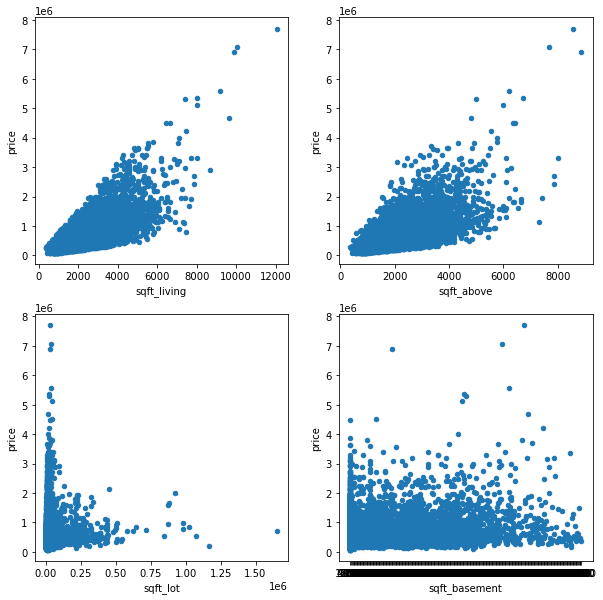

In [271]:
fig, axes = plt.subplots(2,2, figsize=(10,10))
h_price.plot.scatter(x='sqft_living', y='price', ax=axes[0][0])
#axes[0][0].set_xlabel('Sqft living')
h_price.plot.scatter(x='sqft_lot', y='price', ax=axes[1][0])
h_price.plot.scatter(x='sqft_above', y='price', ax=axes[0][1])
h_price.plot.scatter(x='sqft_basement', y='price', ax=axes[1][1]);
#axes[1][1].locator_params(axis='x', numticks=5)#nbins=4)

* strong linear dependence for living size
* equal dependence of above size
* no systematic dependence on lot, high lots probably farms
* no systematic dependence for basement size

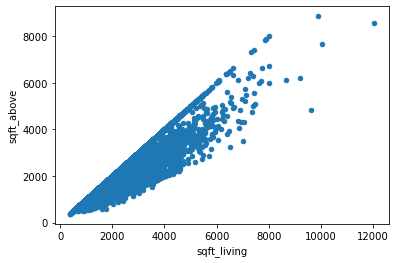

In [279]:
h_price.plot.scatter(x='sqft_living', y='sqft_above');

* very strong linear dependence, neglect sqft above

In [566]:
# Create column price / m^2 (1 feet = 0,3048 m)
p = 0.3048**2
h_price['price_m2'] = h_price.price / (h_price.sqft_living.values*p)

### 4.2 Price & Rooms

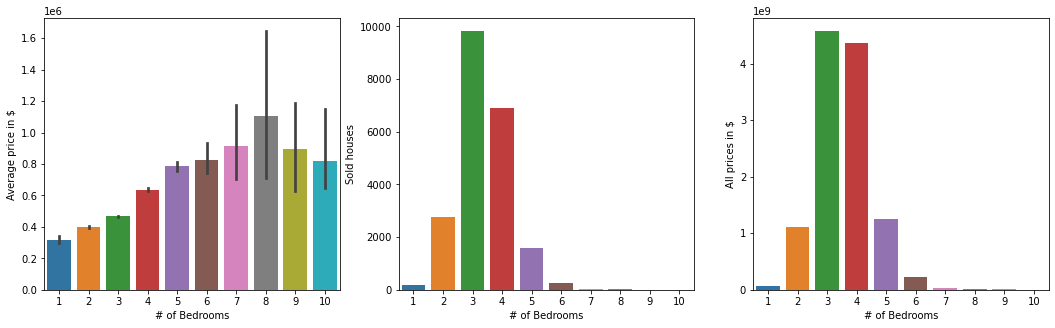

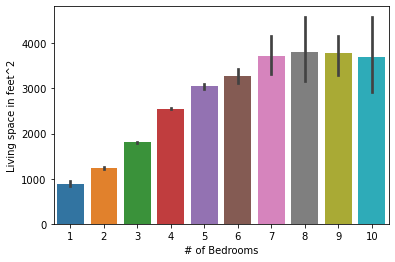

In [609]:
fig, axes = plt.subplots(1,3, figsize=(18,5))
sns.barplot(data=h_price, x='bedrooms', y='price', ax=axes[0])
sns.countplot(data=h_price, x='bedrooms', ax=axes[1])
pricexcount = h_price.groupby('bedrooms').price.mean() * h_price.groupby('bedrooms').price.count()
sns.barplot(x=pricexcount.index, y=pricexcount, ax=axes[2]);
axes[0].set_xlabel('# of Bedrooms')
axes[1].set_xlabel('# of Bedrooms')
axes[2].set_xlabel('# of Bedrooms')
axes[0].set_ylabel('Average price in $')
axes[1].set_ylabel('Sold houses')
axes[2].set_ylabel('All prices in $')
plt.savefig('plots/bedrooms1.png', bbox_inches='tight')
plt.show()
sns.barplot(data=h_price, x='bedrooms', y='sqft_living');
plt.xlabel('# of Bedrooms')
plt.ylabel('Living space in feet^2')
plt.savefig('plots/bedrooms2.png', bbox_inches='tight')

* best price/selling rate is 3-4 bedrooms
* bedrooms > 7 less expensive
    * maybe families with many children, usually not have much money
    * maybe farms

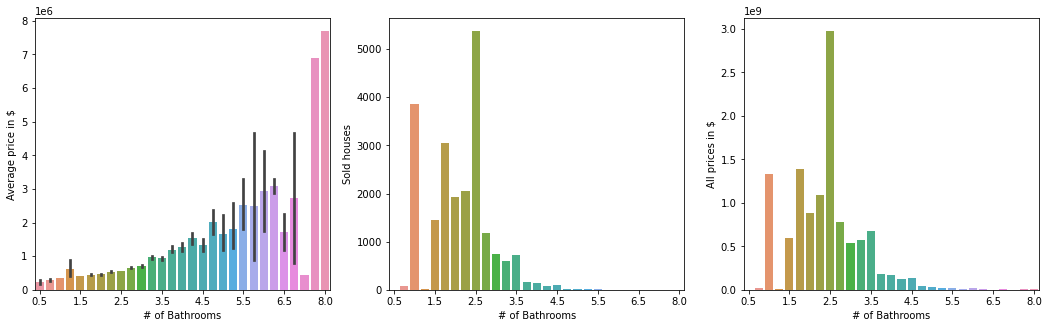

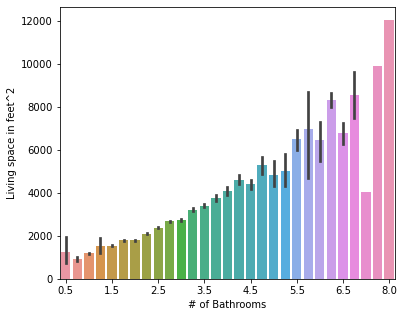

In [608]:
sns.color_palette("tab10")
fig, axes = plt.subplots(1,3, figsize=(18,5))
sns.barplot(data=h_price, x='bathrooms', y='price', ax=axes[0])
#axes[0].MaxNLocator(nbins=5, integer=True)
#h_price.groupby('bathrooms').mean().reset_index().plot.scatter(x='bathrooms', y='price', ax=axes[1])
sns.countplot(data=h_price, x='bathrooms', ax=axes[1]);
pricexcount = h_price.groupby('bathrooms').price.mean() * h_price.groupby('bathrooms').price.count()
sns.barplot(x=pricexcount.index, y=pricexcount, ax=axes[2]);
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(8, integer=True))
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(8, integer=True))
axes[2].xaxis.set_major_locator(ticker.MaxNLocator(8, integer=True))
axes[0].set_xlabel('# of Bathrooms')
axes[1].set_xlabel('# of Bathrooms')
axes[2].set_xlabel('# of Bathrooms')
axes[0].set_ylabel('Average price in $')
axes[1].set_ylabel('Sold houses')
axes[2].set_ylabel('All prices in $')
plt.savefig('plots/bathrooms1.png', bbox_inches='tight')
plt.show()
fig, ax = plt.subplots(figsize=(6,5))
sns.barplot(data=h_price, x='bathrooms', y='sqft_living', ax=ax);
plt.xlabel('# of Bathrooms')
plt.ylabel('Living space in feet^2')
ax.xaxis.set_major_locator(ticker.MaxNLocator(8, integer=True))
plt.savefig('plots/bathrooms2.png', bbox_inches='tight')

* bathrooms < 7: exponentail increase of price
* best price / sell rate for 2.5 bathrooms

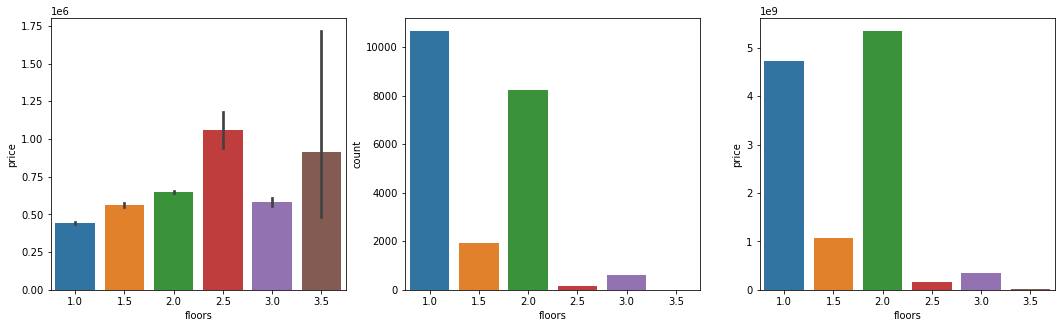

In [410]:
fig, axes = plt.subplots(1,3, figsize=(18,5))
sns.barplot(data=h_price, x='floors', y='price', ax=axes[0])
sns.countplot(data=h_price, x='floors', ax=axes[1]);
pricexcount = h_price.groupby('floors').price.mean() * h_price.groupby('floors').price.count()
sns.barplot(x=pricexcount.index, y=pricexcount, ax=axes[2]);

* best selling / price rates at 1 and 2 floors

### 4.3 Price & date

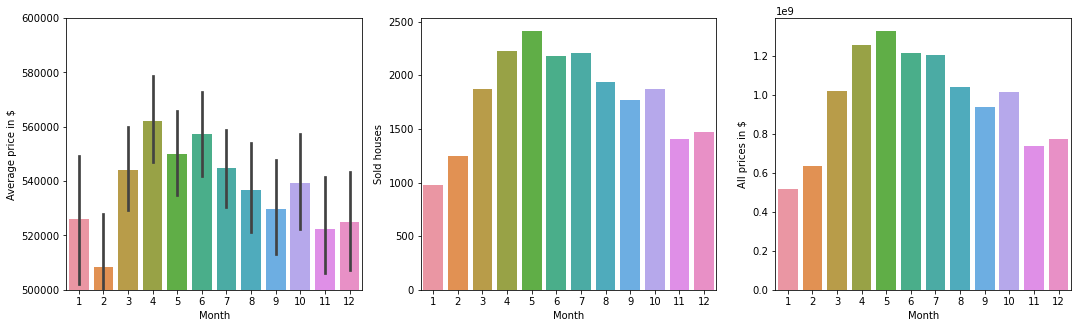

In [604]:
fig, axes = plt.subplots(1,3, figsize=(18,5))
sns.barplot(data=h_price, x='date_m', y='price', ax=axes[0]);
sns.countplot(data=h_price, x='date_m', ax=axes[1]);
pricexcount = h_price.groupby('date_m').price.mean() * h_price.groupby('date_m').price.count()
sns.barplot(x=pricexcount.index, y=pricexcount, ax=axes[2]);

axes[0].set_ylim(500000, 600000)
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average price in $')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Sold houses')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('All prices in $')

plt.savefig('plots/month.png', bbox_inches='tight')
#plt.savefig('plots/month_plot.png', bbox_inches='tight')
#plt.savefig('plots/month_hist.png', bbox_inches='tight')

[paper month price correlation](http://www.normmiller.net/wp-content/uploads/2014/04/Seasonality-Of-Housing-Prices-JHR.pdf)
* more houses bought in summer
* more expensive in summer
* no saying about year, since only one year span

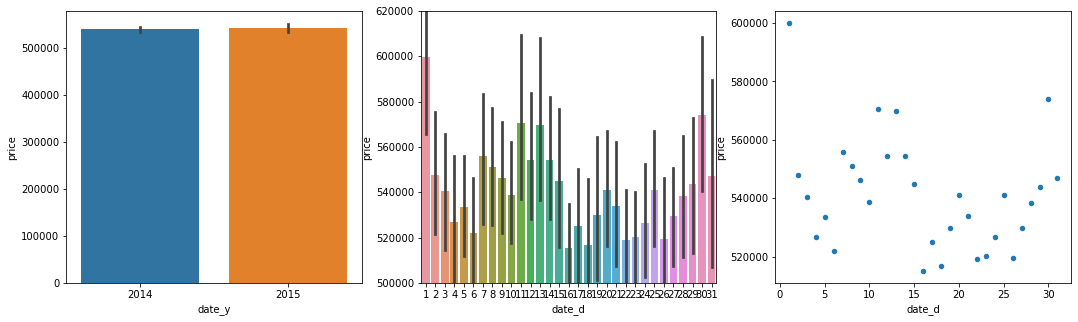

In [432]:
fig, axes = plt.subplots(1,3, figsize=(18,5))
sns.barplot(data=h_price, x='date_y', y='price', ax=axes[0]);
sns.barplot(data=h_price, x='date_d', y='price', ax=axes[1]);
axes[1].set_ylim(500000, 620000)
h_price.groupby('date_d').mean().reset_index().plot.scatter(x='date_d', y='price', ax=axes[2]);

* no useful information from day, year
    * only timespan of one year given...

### 4.4 Price & Coordinates

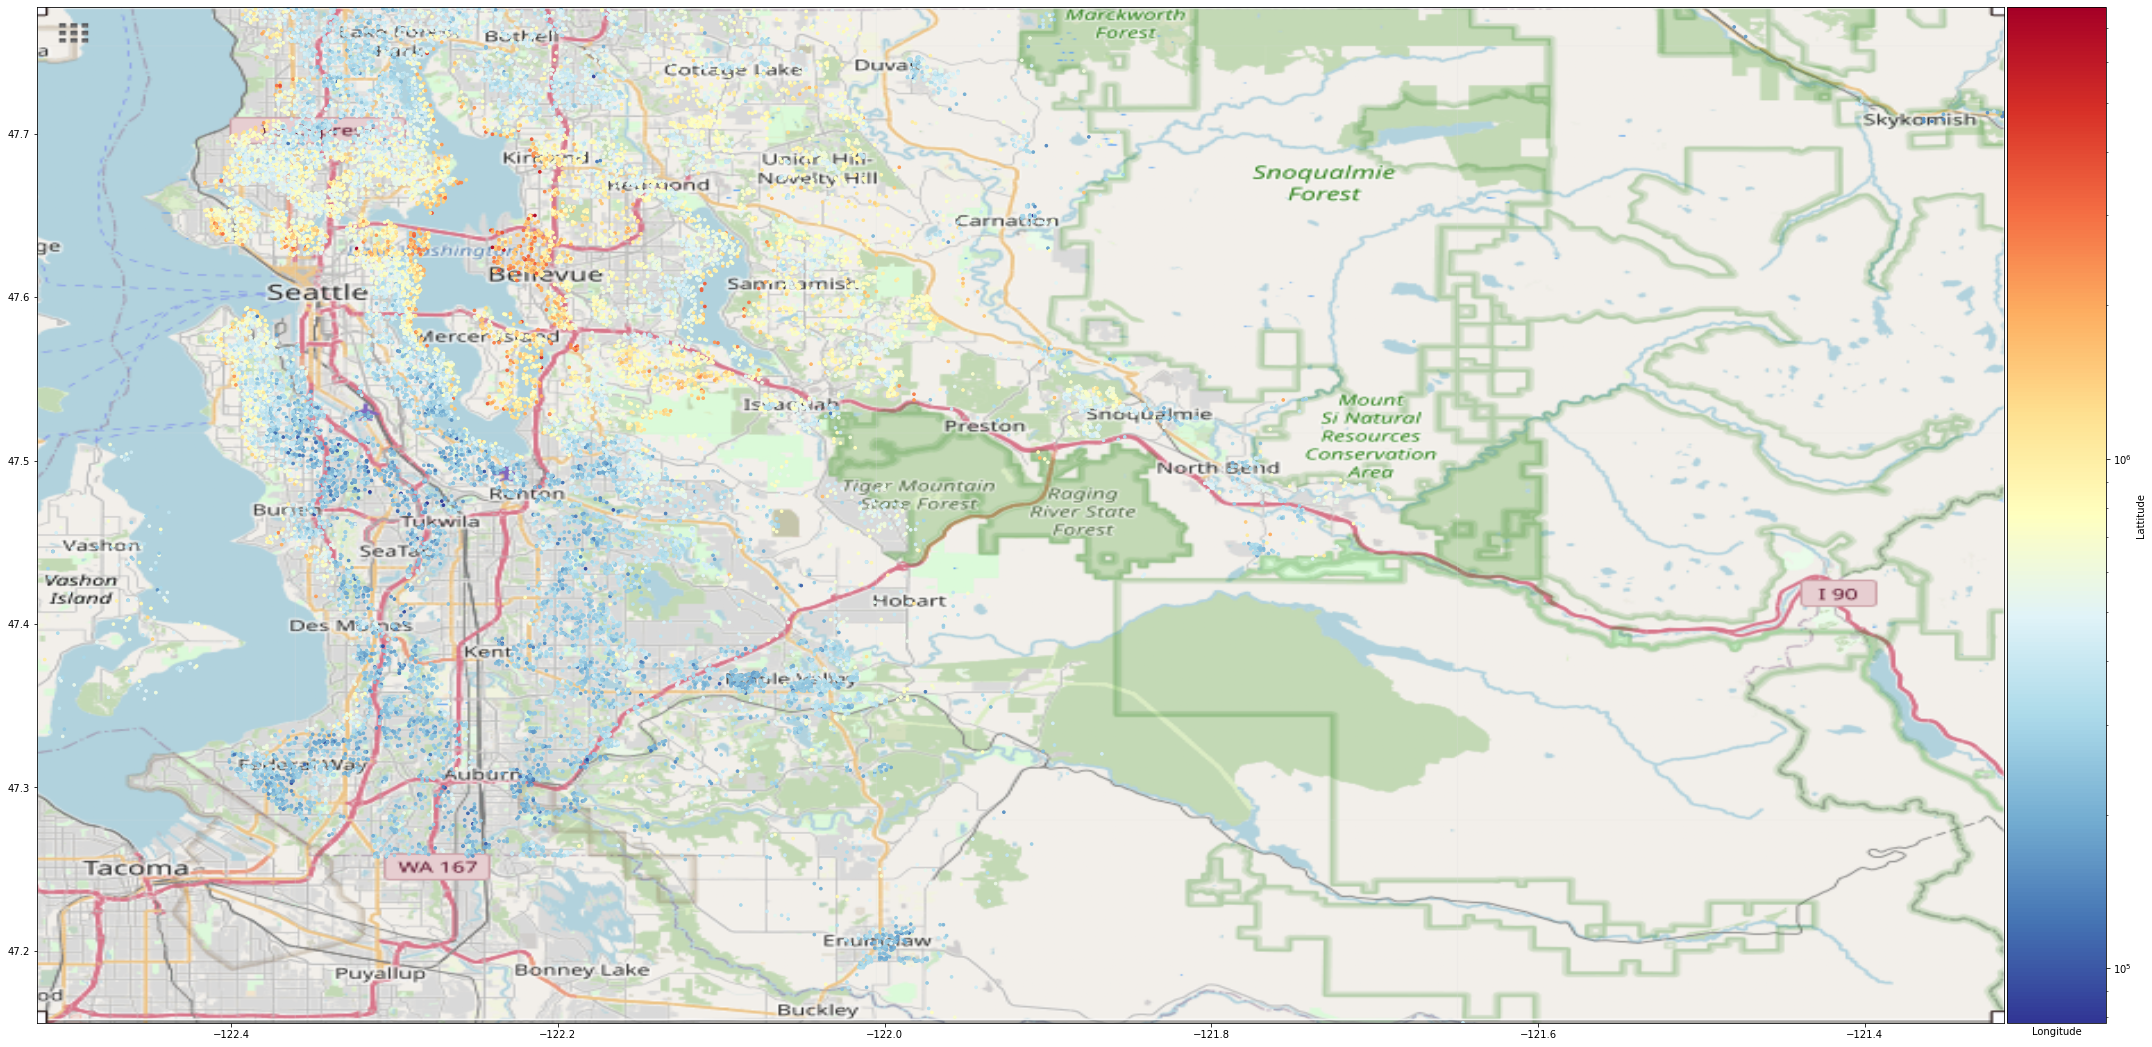

In [612]:
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(figsize=(30, 30))
# background image
img = plt.imread('imgs/map_KingCounty.png')
ax.imshow(img, extent=[h_price.long.min(), h_price.long.max(), h_price.lat.min(), h_price.lat.max()])
cm = plt.cm.get_cmap('RdYlBu_r')
x = h_price.long.values# - h_price.long.min())/(h_price.long.max()-h_price.long.min())*1000
y = h_price.lat.values# - h_price.lat.min())/(h_price.lat.max()-h_price.lat.min())* 1000
z = h_price.price.values
sc = ax.scatter(x, y, c=z, cmap=cm, norm=matplotlib.colors.LogNorm(), s=7)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

#plt.colorbar(im, cax=cax)
plt.colorbar(sc, cax=cax);
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
#ax.set_xlim(h_price.long.min(), h_price.long.max())
#ax.set_ylim(h_price.lat.min(), h_price.lat.max())
plt.tight_layout()
plt.savefig('plots/map.png')

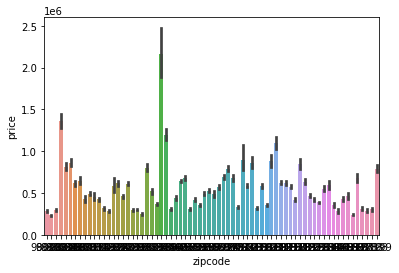

In [111]:
#zip = h_price.groupby('zipcode')
#h_price.plot.bar(x='zipcode', y='price');
sns.barplot(data = h_price, x = 'zipcode', y = 'price');
# Very different for different zips

In [556]:
# Create column for city
zips = '98002 98092 98224 98004 98005 98006 98007 98008 98010 98011 98178 98148 98166 98014 98077 98042 98198 98019 98031 98022 98058 98024 98003 98023 98027 98029 98028 98032 98030 98033 98034 98001 98038 98039 98040 98045 98047 98050 98051 98052 98055 98056 98057 98059 98074 98075 98188 98199 98174 98154 98158 98164 98101 98102 98103 98104 98105 98106 98107 98108 98109 98112 98115 98116 98117 98118 98119 98121 98122 98125 98126 98133 98134 98136 98144 98155 98177 98288 98065 98168 98053 98195 98070 98146 98072'
cities = 'Auburn Auburn Baring Bellevue Bellevue Bellevue Bellevue Bellevue Black Bothell Bryn Burien Burien Carnation Cottage Covington Des Duvall East Enumclaw Fairwood Fall Federal Federal Issaquah Issaquah Kenmore Kent Kent Kirkland Kirkland Lakeland Maple Medina Mercer North Pacific Preston Ravensdale Redmond Renton Renton Renton Renton Sammamish Sammamish SeaTac Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Seattle Shoreline Shoreline Skykomish Snoqualmie Tukwila Union Univ Vashon White Woodinville'
zips = zips.split(' ')
cities = cities.split(' ')
dic = dict(zip(zips,cities))
h_price['city'] = [dic[str(i)] for i in h_price.zipcode.values]
#h_price.head()


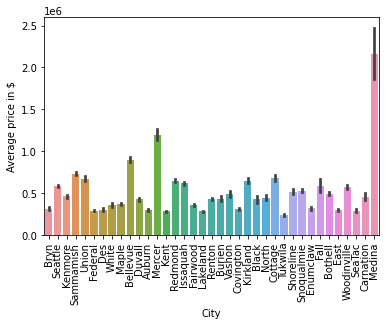

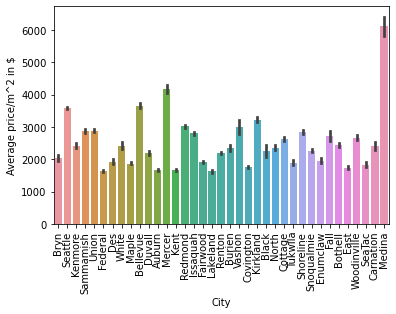

In [605]:
chart = sns.barplot(data = h_price, x = 'city', y = 'price');
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);
plt.xlabel('City')
plt.ylabel('Average price in $');
plt.savefig('plots/city1.png', bbox_inches='tight')
plt.show()
chart = sns.barplot(data = h_price, x = 'city', y = 'price_m2');
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);
plt.xlabel('City')
plt.ylabel('Average price/m^2 in $');
plt.savefig('plots/city2.png', bbox_inches='tight')

### 4.5 Price & Grades / condition

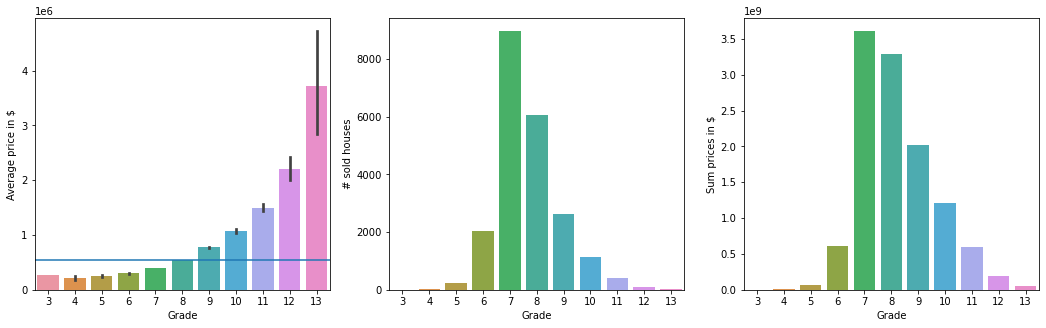

In [606]:
fig, axes = plt.subplots(1,3, figsize=(18,5))
sns.barplot(data=h_price, x='grade', y='price', ax=axes[0]);
sns.countplot(data=h_price, x='grade', ax=axes[1]);
pricexcount = h_price.groupby('grade').price.mean() * h_price.groupby('grade').price.count()
sns.barplot(x=pricexcount.index, y=pricexcount, ax=axes[2]);
axes[0].set_xlabel('Grade')
axes[1].set_xlabel('Grade')
axes[2].set_xlabel('Grade')
axes[0].set_ylabel('Average price in $')
axes[1].set_ylabel('# sold houses')
axes[2].set_ylabel('Sum prices in $');
#axes[0].plot([-5,13], [h_price.price.mean(),h_price.price.mean()], 'k--', lw=2)
axes[0].axhline(h_price.price.mean())
plt.savefig('plots/grade.png', bbox_inches='tight')

* price is exponentially related to grade
* buyers interest starts at grade 7

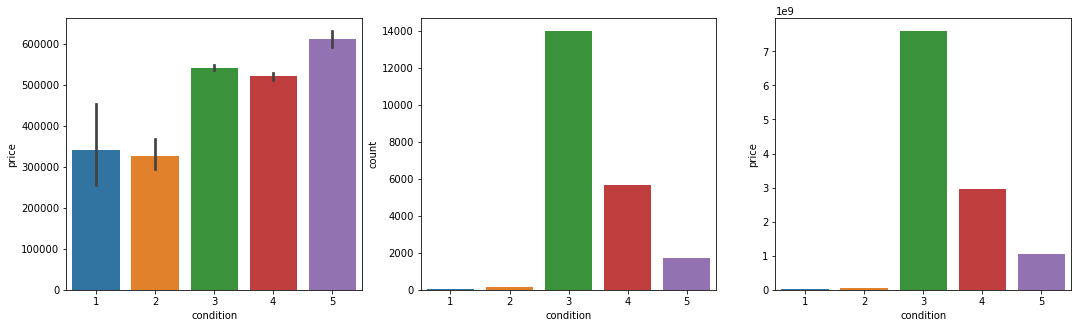

In [607]:
fig, axes = plt.subplots(1,3, figsize=(18,5))
sns.barplot(data=h_price, x='condition', y='price', ax=axes[0]);
sns.countplot(data=h_price, x='condition', ax=axes[1]);
pricexcount = h_price.groupby('condition').price.mean() * h_price.groupby('condition').price.count()
sns.barplot(x=pricexcount.index, y=pricexcount, ax=axes[2]);
plt.savefig('plots/condition.png', bbox_inches='tight')

* count for condition < 3 neglectable
* price not considerably rising after 3

### 4.6 Price & view / waterfront

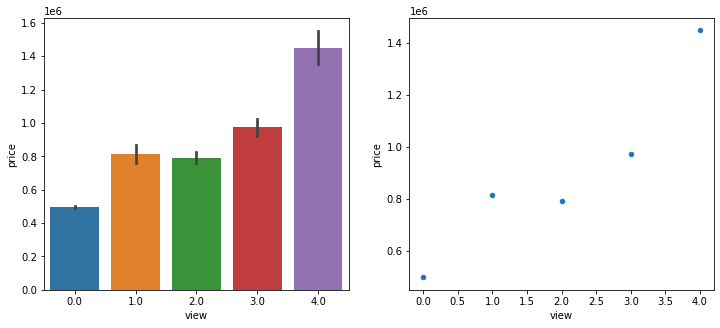

In [457]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(data=h_price, x='view', y='price', ax=axes[0]);
h_price.groupby('view').mean().reset_index().plot.scatter(x='view', y='price', ax=axes[1]);

In [ ]:
# linear dependency from view
# just 63 NANs, drop values

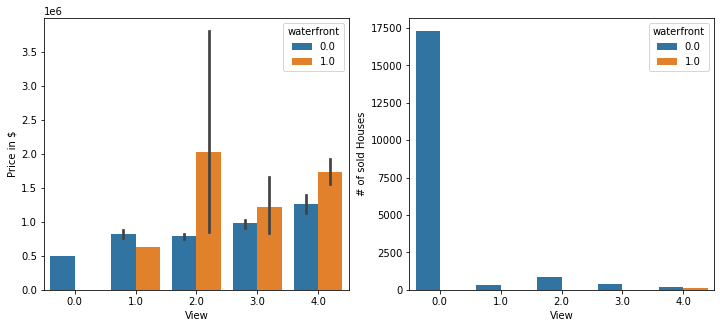

In [460]:
fig, axes = plt.subplots(1,2,figsize=(12,5))
sns.barplot(data=h_price, x='view', y='price', hue='waterfront', ax=axes[0]);
axes[0].set_xlabel('View')
axes[0].set_ylabel('Price in $')

sns.countplot(data=h_price, x='view', hue='waterfront', ax=axes[1])
axes[1].set_xlabel('View')
axes[1].set_ylabel('# of sold Houses');
#plt.savefig('plots/view.png', bbox_inches='tight')
#plt.savefig('plots/view_num.png', bbox_inches='tight')

* 11% of values missing for waterfront
* 

### 4.7 Price & year built / year renovated

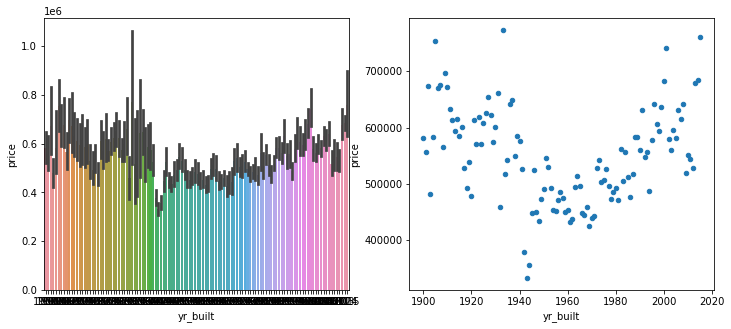

In [464]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(data=h_price, x='yr_built', y='price', ax=axes[0]);
h_price.groupby('yr_built').mean().reset_index().plot.scatter(x='yr_built', y='price', ax=axes[1]);

* best building years are oldest and newest
    * new are better buildings
    * old have old character

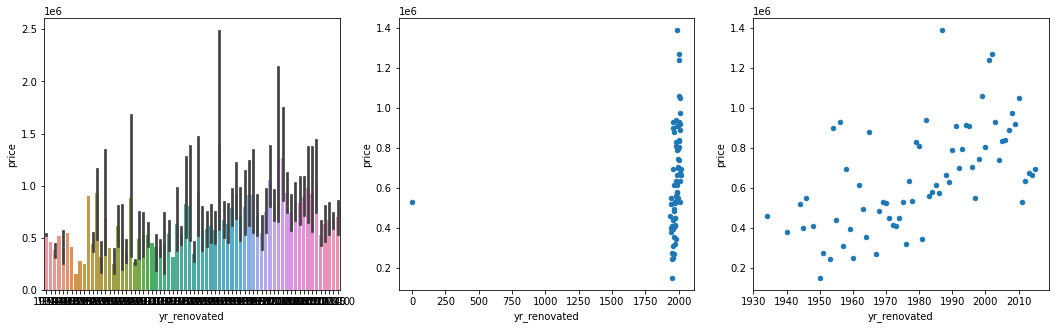

In [465]:
fig, axes = plt.subplots(1,3, figsize=(18,5))
sns.barplot(data=h_price, x='yr_renovated', y='price', ax=axes[0]);
h_price.groupby('yr_renovated').mean().reset_index().plot.scatter(x='yr_renovated', y='price', ax=axes[1]);
### find outlier in yr renovated:
h_price.query('yr_renovated == 0').shape
h_price.query('yr_renovated > 0').groupby('yr_renovated').mean().reset_index().plot.scatter(x='yr_renovated', y='price', ax=axes[2]);
# almost no observations have yr-renovated, so keep it out

* 18% of yr renovated values missing
* linear dependency: newer renovation -> higher price

### 4.8 Price & sqft 15

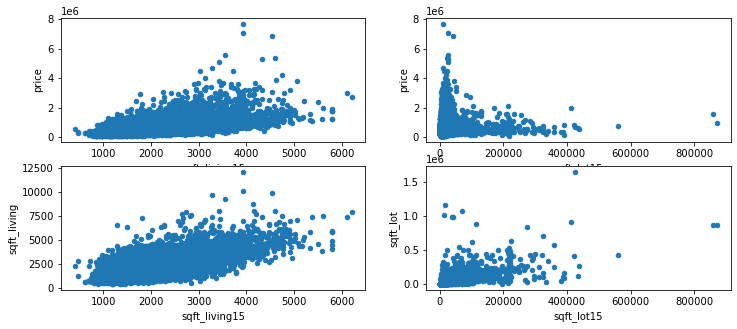

In [488]:
fig, axes = plt.subplots(2, 2, figsize=(12, 5))
h_price.plot.scatter(x='sqft_living15', y='price', ax=axes[0][0]);
h_price.plot.scatter(x='sqft_lot15', y='price', ax=axes[0][1]);
# Check correlation with real values
h_price.plot.scatter(x='sqft_living15', y='sqft_living', ax=axes[1][0]);
h_price.plot.scatter(x='sqft_lot15', y='sqft_lot', ax=axes[1][1]);

* strong correlation between living, living 15
* strong correlation between lot, lot 15